In [1]:
!pip install -q --upgrade librosa

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import audio_transform

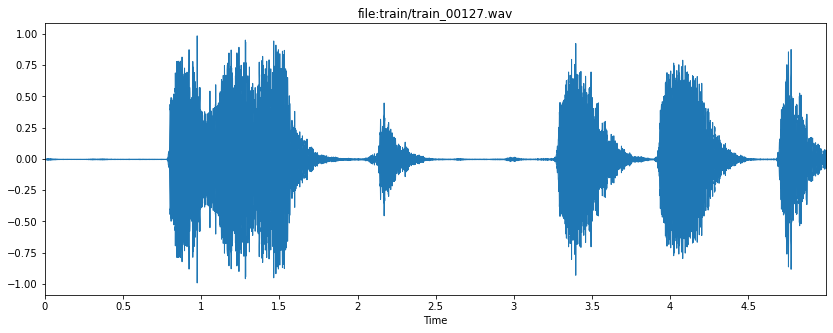

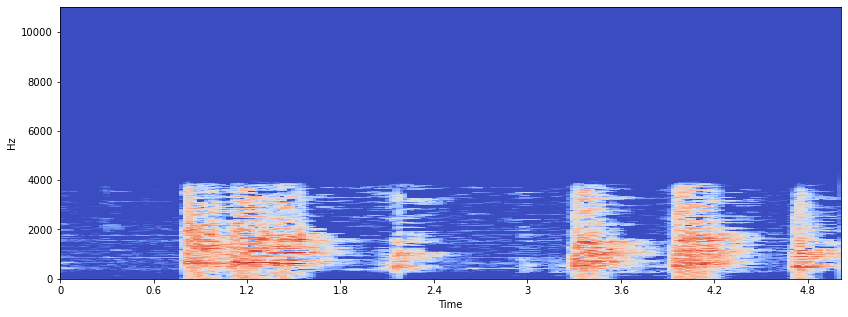

In [3]:
file_name_format = 'train/train_{}.wav'
begin = 1
end = 1200
ith = np.random.randint(1,1200+1)
load = lambda ith : (librosa.load(file_name_format.format(str(ith).zfill(5))), file_name_format.format(str(ith).zfill(5)))
(x,sr), file_name = load(ith)

plt.figure(figsize=(14, 5))
plt.title(f"file:{file_name}")
librosa.display.waveplot(x, sr=sr)
plt.show()
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [4]:
import IPython.display as ipd

Audio = lambda *args, **kwargs : ipd.display(ipd.Audio(*args, **kwargs))

In [9]:
x, sr = load(909)[0]

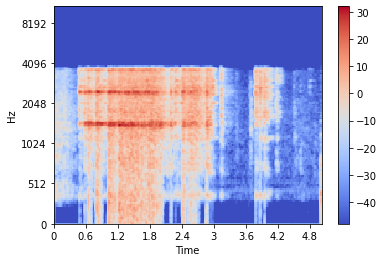

In [10]:
melspec_x = librosa.power_to_db(librosa.feature.melspectrogram(x, sr=sr, n_mels=128))
librosa.display.specshow(melspec_x, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar();
plt.show()

In [11]:
melspec_x.shape

(128, 216)

In [13]:
Audio(x,rate=sr,autoplay=False)

In [8]:
aug = audio_transform.PitchShift()

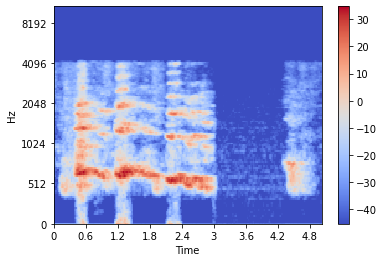

In [45]:
aug_x = aug(x)
# aug_x = librosa.effects.pitch_shift(x, sr, n_steps=np.random.randint(-5,5))
melspec_x = librosa.power_to_db(librosa.feature.melspectrogram(aug_x, sr=sr, n_mels=128))
librosa.display.specshow(melspec_x, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar();
plt.show()
Audio(aug_x,rate=sr,autoplay=True)

In [5]:
%time
import multiprocessing
def process(ith):
  (x,sr), file_name = load(ith)
  return (file_name, x, sr)

pool_map = multiprocessing.Pool(processes=32)
ret = pool_map.map(process, range(1, 1200+1))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


In [13]:
shift = 20
start = shift*3
for file_name, x, sr in ret[start: start+shift]:
  print(file_name)
  Audio(x, rate=sr)

train/train_00061.wav


train/train_00062.wav


train/train_00063.wav


train/train_00064.wav


train/train_00065.wav


train/train_00066.wav


train/train_00067.wav


train/train_00068.wav


train/train_00069.wav


train/train_00070.wav


train/train_00071.wav


train/train_00072.wav


train/train_00073.wav


train/train_00074.wav


train/train_00075.wav


train/train_00076.wav


train/train_00077.wav


train/train_00078.wav


train/train_00079.wav


train/train_00080.wav


In [6]:
import collections

In [7]:
len_dict = collections.defaultdict(list)
for name, x, sr in ret:
  len_dict[len(x)].append(name)

In [8]:
len_dict

defaultdict(list,
            {110250: ['train/train_00001.wav',
              'train/train_00002.wav',
              'train/train_00003.wav',
              'train/train_00004.wav',
              'train/train_00005.wav',
              'train/train_00006.wav',
              'train/train_00007.wav',
              'train/train_00008.wav',
              'train/train_00009.wav',
              'train/train_00010.wav',
              'train/train_00011.wav',
              'train/train_00012.wav',
              'train/train_00013.wav',
              'train/train_00014.wav',
              'train/train_00015.wav',
              'train/train_00016.wav',
              'train/train_00017.wav',
              'train/train_00018.wav',
              'train/train_00019.wav',
              'train/train_00020.wav',
              'train/train_00021.wav',
              'train/train_00022.wav',
              'train/train_00023.wav',
              'train/train_00024.wav',
              'train/train_00025.wav',